## Context of Data

Company-wide Employees E-Commerce purchase data

Customers - Most purchased ones are belongs to Dietitian, Lawyers professionals

Transactions purchase range on average of $50

Transaction purchase period all through 24hours

Results obtained from Exploratory Data Analysis (EDA)

<font color=blue>

1. The customer with the highest number of purchase comes from the Dietitian Professionals

2. 'Brown Ltd' company's employees have purchased most values as $796.38

3. The TOP 5 companies employees placed the highest number of purchases as below:

        Brown Ltd
        Williams LLC
        Smith LLC
        Smith PLC
        Johnson Ltd

4. The TOP purchased customer brownsarah@gmail.com with the value as $198.83

5. The Top 5 customer's purchases are
        brownsarah@gmail.com    ==> $198.83
        wjohnson@yahoo.com      ==> $175.61
        cgray@gmail.com         ==> $154.41
        lawrenceemily@yahoo.com ==> $154.31
        wilsonjohn@yahoo.com    ==> $153.36

6. The highest number of purchase are done in the evening(PM)

7. The highest number of purchase are done by [ru] language customers

8. Majority of the customers(around 79.2%) customers are using Mozilla for browsing and to purchase items
</font>

In [1]:
import numpy as np
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ecom = pd.read_csv('Ecommerce_Purchases.csv')
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [3]:
ecom['Purchase Price'].describe()

count    10000.000000
mean        50.347302
std         29.015836
min          0.000000
25%         25.150000
50%         50.505000
75%         75.770000
max         99.990000
Name: Purchase Price, dtype: float64

In [4]:
# People who have English 'en' as their Language of choice on the website

ecom[ecom['Language']=='en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

In [5]:
#count number of transacations in AM and PM
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [6]:
#top five jobs
ecom['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Designer, jewellery                  27
Name: Job, dtype: int64

In [7]:
#top five email providers
ecom['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [8]:

selected_columns = ecom[['AM or PM', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price']]

cleaned_ecom = selected_columns.copy()

In [9]:
#clean up address
address = ecom['Address'].str.extract(r",*\W*([A-Z]{2}\W+[0-9\-]*)$", expand = False)
address = address.str.split(pat=r"\W|\-", expand = True)

In [10]:
#clean browser
browser = ecom['Browser Info'].str.split(pat=r" |\(|\)", expand = True)
browser_and_ver = browser[0].str.split(pat=r"/", expand = True)

In [11]:
cleaned_ecom['Browser'] = browser_and_ver[0]
cleaned_ecom['Browser Version'] = browser_and_ver[1]
cleaned_ecom['CC Exp Year'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[1].astype(int)
cleaned_ecom['CC Exp Month'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[0].astype(int)
cleaned_ecom['State'] =   address[0]
cleaned_ecom['ZIP Code'] =   address[1]
cleaned_ecom['ZIP Code'] = cleaned_ecom['ZIP Code'].astype(int)
cleaned_ecom['CC Provider'] = cleaned_ecom['CC Provider'].str.split(pat = '\d', expand = True)[0]
cleaned_ecom.nunique() #There are 10000 different credit cards registered and 10000 different IP addresses
#but interestingly not 10000 different email addresses. Hence email address is not used to maintain user account 

AM or PM                2
Company              8653
Credit Card         10000
CC Exp Date           121
CC Security Code     1758
CC Provider             8
Email                9954
Job                   623
IP Address          10000
Language                9
Purchase Price       6349
Browser                 2
Browser Version       181
CC Exp Year            11
CC Exp Month           12
State                  62
ZIP Code             9543
dtype: int64

In [12]:
# Write contents of the DataFrame to a CSV file

#newcsvFileName = 'New_Ecommerce_Purchases.csv'

#new_ecom.to_csv(newcsvFileName,index=False);

In [13]:
cleaned_ecom = cleaned_ecom.drop_duplicates() #drop duplicates if any
cleaned_ecom

,AM or PM,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Browser,Browser Version,CC Exp Year,CC Exp Month,State,ZIP Code
0,PM,Martinez-Herman,6011929061123406,02/20,900,JCB,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Opera,9.56.,20,2,NE,77130
1,PM,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Opera,8.93.,18,11,TN,84355
2,PM,"Simpson, Williams and Pham",675957666125,08/19,699,JCB,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Mozilla,5.0,19,8,AP,27450
3,PM,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mozilla,5.0,24,2,WA,45798
4,AM,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Opera,9.58.,25,10,TX,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PM,Randall-Sloan,342945015358701,03/22,838,JCB,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21,Mozilla,5.0,22,3,CO,96415
9996,AM,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63,Mozilla,5.0,25,7,TX,55158
9997,AM,Anderson Ltd,6011539787356311,05/21,1,VISA,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98,Mozilla,5.0,21,5,AE,28026
9998,PM,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84,Mozilla,5.0,17,11,IA,12457


In [14]:
cleaned_ecom.describe()

,Credit Card,CC Security Code,Purchase Price,CC Exp Year,CC Exp Month,ZIP Code
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.341374e+15,907.217800,50.347302,21.173100,6.42570,49808.190700
std,2.256103e+15,1589.693035,29.015836,2.918114,3.46648,28965.375251
min,6.040186e+10,0.000000,0.000000,16.000000,1.00000,29.000000
25%,3.056322e+13,280.000000,25.150000,19.000000,3.00000,24745.000000
50%,8.699942e+14,548.000000,50.505000,21.000000,6.00000,49695.000000
75%,4.492298e+15,816.000000,75.770000,24.000000,9.00000,75011.250000
max,6.012000e+15,9993.000000,99.990000,26.000000,12.00000,99994.000000


In [15]:

class DataFrameWithImputor():
    def __init__(self,df):
        self.df=df
        
    def get_data_frame(self):
        return self.df
    
       
    #Randomly find indexes for x% of the column to populate with NaN values
    def introduce_errors(self, attribute, percent):
        column = self.df[attribute]
        error_data = int(column.size * percent)
        i = [random.choice(range(column.shape[0])) for _ in range(error_data)]
        column[i] = np.NaN
        self.df[attribute] = column
        return len(set(i)) # lengh of error indexes
    
    #Randomly find indexes for x% of the cells to populate with NaN values
    def introduce_errors_in_dataframe(self, percent):
        rows = len(self.df.index)
        error_data = int(rows * percent)
        columns = len(self.df.columns)
        for i in range(error_data):
            col = i  % columns
            row = i % rows
            self.df.iloc[row,col] = np.NaN
        return self.df.isnull().sum().sum()



    def impute(self,column,value):
        #Impute NaN values in the column with a random value

        null_values = self.df[self.df[column].isnull()].index

        for i in range(len(null_values)):
            self.df[column][null_values]  = value

        col_description = pd.DataFrame(self.df[column].describe())
        col_description.loc['Frequent'] = self.df[column].value_counts().idxmax()
        return col_description

    def get_nan_count(self):
        return self.df.isnull().sum()
    
    
    def find_empty_string(self):
        return np.where(self.df.applymap(lambda x: x == '')) # return rows with empty string
    
    def nan_values_in_column(self):
        return np.where(pd.isnull(self.df)) #return indexes for null values in a row
    
    def describe(self):
        return self.df.describe
    
    def describe_col(self, col):
        desc = pd.DataFrame(self.df[col].describe())
        
        desc.loc['Frequent'] = self.df[col].value_counts().idxmax()
        return desc
    
    def fillforward(self):
        self.df = self.df.fillna(method='ffill',axis = 0)
        
     
    def fillbackward(self):
        self.df = self.df.fillna(method='bfill',axis = 0)
        
        
   
        

In [16]:
unimputed = DataFrameWithImputor(cleaned_ecom) 
if len(unimputed.find_empty_string()) > 2:
    print('Empty strings in the data frame')
    
if len(unimputed.nan_values_in_column()) > 2:
    print('NaN in the data frame')
    

In [17]:
 def do_imputation(df,column,error_rate,condition = None  ):
        
        imp = DataFrameWithImputor(df.copy()) 

        imp.introduce_errors(column,error_rate)
        
        if condition != None:
            imp.impute(column,condition)
        else:
            #Impute through backfill and forwardfill
            imp.fillbackward()
            imp.fillforward()
        
        return imp
    
    

In [18]:
#####
#  Mean imputation
#####

mean_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].mean())


#####
#  Median imputation
#####
#Impute NaN values in the column with the median


median_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].median())

#####
#  Random imputation
#####

random_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1,random.choice(range(1,99))) 

#####
#  Impute with constant
#####

const_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, 50)

#Forward and backward fill to impute data
#
#
fill_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1) 



<ipython-input-15-d63b4abb2945>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = np.NaN
<ipython-input-15-d63b4abb2945>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column][null_values]  = value


In [19]:
fill_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.329560
std,28.978895
min,0.000000
25%,25.247500
50%,50.325000
75%,75.740000
max,99.990000
Frequent,49.730000


In [20]:
const_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.197819
std,27.648843
min,0.000000
25%,27.610000
50%,50.000000
75%,72.822500
max,99.990000
Frequent,50.000000


In [21]:
median_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.172003
std,27.634100
min,0.000000
25%,27.570000
50%,50.505000
75%,72.772500
max,99.990000
Frequent,50.505000


In [22]:
random_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,51.384535
std,27.830744
min,0.000000
25%,27.767500
50%,55.690000
75%,73.065000
max,99.990000
Frequent,61.000000


In [23]:
mean_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.312616
std,27.565020
min,0.000000
25%,27.855000
50%,50.347302
75%,72.812500
max,99.990000
Frequent,50.347302


In [24]:
unimputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.347302
std,29.015836
min,0.000000
25%,25.150000
50%,50.505000
75%,75.770000
max,99.990000
Frequent,49.730000


In [25]:
df = mean_imputed.get_data_frame()


In [62]:
#jobCount = df['Job'].value_counts().rename_axis('Job').reset_index(name='Count')
#jobPurchase= df.groupby('Job')['Purchase Price'].sum().rename_axis('Job').reset_index()
#Map the number of people of a particular Job to the amount the Job type is spending
#jobPurchase.merge(jobCount, on='Job', how = 'inner' ).sort_values(by ='Purchase Price', ascending = False).head()
#We can see that the dietian is one of the most populous job designation, hence it is the group that spends the most 

,Job,Purchase Price,Count
158,Dietitian,1605.300000,26
473,Purchasing manager,1571.954604,27
325,Lawyer,1560.027302,30
589,"Therapist, art",1540.091906,25
151,"Designer, jewellery",1525.474604,27


#### 1. Find the relationship between Job designation and Purchase amount

In [79]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].sum()#group by Job and sort by total purchase amount

res1= job.sort_values(by='Purchase Price', ascending=False).iloc[:5,:] 

,Job,Purchase Price
0,Academic librarian,555.257302
1,Accommodation manager,629.650000
2,"Accountant, chartered",1115.311906
3,"Accountant, chartered certified",1043.010000
4,"Accountant, chartered management",1033.327302
...,...,...
618,Water quality scientist,798.667302
619,Web designer,1179.874604
620,Wellsite geologist,1231.420000
621,Writer,475.394604


In [82]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].mean()
res2= job.sort_values(by='Purchase Price', ascending=False).iloc[:5,:]
res2
#Calculating the mean Purchase price by Job Designation
#We can see that Trade Mark attorney is the job type that makes the biggest ppurchases on avg

,Job,Purchase Price
602,Trade mark attorney,73.802727
101,Clinical cytogeneticist,69.274632
4,"Accountant, chartered management",68.888487
20,Advertising account planner,68.200522
603,Trade union research officer,68.140811


In [83]:
job.describe()

,Purchase Price
count,623.000000
mean,50.269132
std,7.012745
min,29.684964
25%,45.871218
50%,50.037857
75%,54.832367
max,73.802727


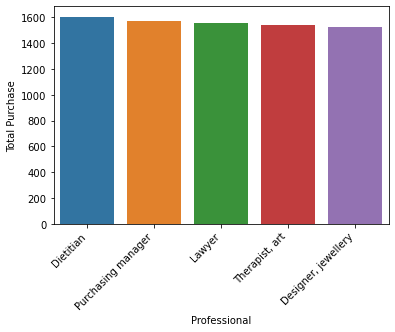

In [29]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1)
ax.set(xlabel="Professional", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

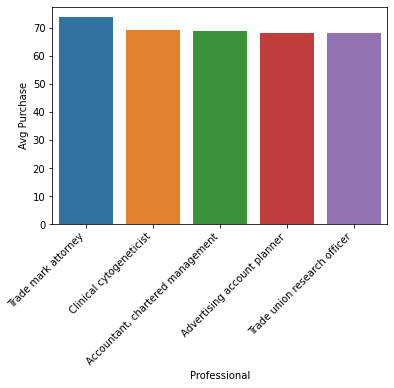

In [30]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res2)
ax.set(xlabel="Professional", ylabel = "Avg Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### 2. How does purchase value depend on the Internet Browser used and Job (Profession) of the purchaser?

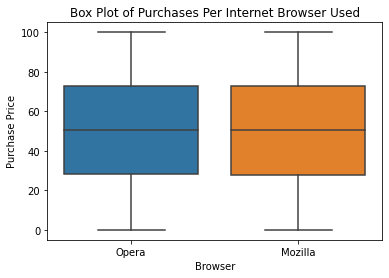

In [31]:
sns.boxplot(x='Browser',y='Purchase Price',data=df)
plt.title('Box Plot of Purchases Per Internet Browser Used')
plt.show()

In [32]:
job_mean = df.groupby(by=['Job','Browser'],as_index=False)['Purchase Price'].mean()
job_mean.rename(columns = {'Purchase Price':'Avg. Purchase Value'},inplace=True)
job_mean_mozilla = job_mean[job_mean['Browser']=='Mozilla']
job_mean_opera = job_mean[job_mean['Browser']=='Opera']
job_mean_merge = pd.merge(job_mean_mozilla,job_mean_opera,left_on='Job',right_on='Job',how='outer')
job_mean_merge.rename(columns = {'Avg. Purchase Value_x':'Avg. Mozilla Purchase Value',
                                 'Avg. Purchase Value_y':'Avg. Opera Purchase Value'},inplace=True)
job_mean_merge.drop(['Browser_x','Browser_y'],axis=1,inplace=True)
job_mean_merge

,Job,Avg. Mozilla Purchase Value,Avg. Opera Purchase Value
0,Academic librarian,49.084730,64.410000
1,Accommodation manager,38.788182,33.830000
2,"Accountant, chartered",57.926950,50.722434
3,"Accountant, chartered certified",60.320000,51.770000
4,"Accountant, chartered management",64.992730,76.680000
...,...,...,...
618,Water quality scientist,48.464408,33.726000
619,Web designer,61.341893,54.632857
620,Wellsite geologist,49.675909,69.275000
621,Writer,46.973845,52.630000


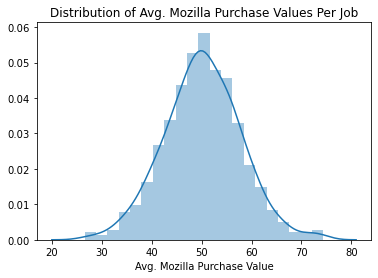

In [33]:
sns.distplot(job_mean_merge['Avg. Mozilla Purchase Value'])
plt.title('Distribution of Avg. Mozilla Purchase Values Per Job')
plt.show()

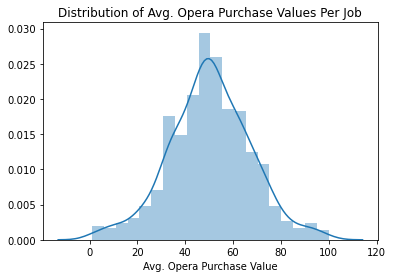

In [34]:
sns.distplot(job_mean_merge['Avg. Opera Purchase Value'])
plt.title('Distribution of Avg. Opera Purchase Values Per Job')
plt.show()

In [35]:
job_sum = df.groupby(by=['Job','Browser'],as_index=False)['Purchase Price'].sum()
job_sum.rename(columns = {'Purchase Price':'Total Purchase Value'},inplace=True)
job_sum_mozilla = job_sum[job_sum['Browser']=='Mozilla']
job_sum_opera = job_sum[job_sum['Browser']=='Opera']
job_sum_merge = pd.merge(job_sum_mozilla,job_sum_opera,left_on='Job',right_on='Job',how='outer')
job_sum_merge.rename(columns = {'Total Purchase Value_x':'Total Mozilla Purchase Value',
                                'Total Purchase Value_y':'Total Opera Purchase Value'},inplace=True)
job_sum_merge.drop(['Browser_x','Browser_y'],axis=1,inplace=True)
job_sum_merge

,Job,Total Mozilla Purchase Value,Total Opera Purchase Value
0,Academic librarian,490.847302,64.410000
1,Accommodation manager,426.670000,202.980000
2,"Accountant, chartered",810.977302,304.334604
3,"Accountant, chartered certified",784.160000,258.850000
4,"Accountant, chartered management",649.927302,383.400000
...,...,...,...
618,Water quality scientist,630.037302,168.630000
619,Web designer,797.444604,382.430000
620,Wellsite geologist,1092.870000,138.550000
621,Writer,422.764604,52.630000


In [36]:
#job_mean = df.groupby(by=['Job','Browser'],as_index=False)['Purchase Price'].mean()
#job_mean.rename(columns = {'Purchase Price':'Avg. Purchase Value'},inplace=True)
#job_mean_merge = pd.merge(job_mean_mozilla,job_mean_opera,left_on='Job',right_on='Job',how='outer')
#job_mean_merge.rename(columns = {'Avg. Purchase Value_x':'Avg. Mozilla Purchase Value',
#                                 'Avg. Purchase Value_y':'Avg. Opera Purchase Value'},inplace=True)
#job_mean_merge.drop(['Browser_x','Browser_y'],axis=1,inplace=True)
#job_mean_merge

In [37]:
job_count = df.groupby(by=['Job','Browser'],as_index=False)['Purchase Price'].count()
job_count.rename(columns = {'Purchase Price':'Count of Purchases'},inplace=True)
job_count


,Job,Browser,Count of Purchases
0,Academic librarian,Mozilla,10
1,Academic librarian,Opera,1
2,Accommodation manager,Mozilla,11
3,Accommodation manager,Opera,6
4,"Accountant, chartered",Mozilla,14
...,...,...,...
1217,Wellsite geologist,Opera,2
1218,Writer,Mozilla,9
1219,Writer,Opera,1
1220,Youth worker,Mozilla,15


In [38]:
job_count_mozilla = job_count[job_count['Browser']=='Mozilla']
job_count_opera = job_count[job_count['Browser']=='Opera']
job_count_merge = pd.merge(job_count_mozilla,job_count_opera,left_on='Job',right_on='Job',how='outer')
job_count_merge.rename(columns = {'Count of Purchases_x':'Count of Mozilla Purchases',
                                  'Count of Purchases_y':'Count of Opera Purchases'},inplace=True)
job_count_merge.drop(['Browser_x','Browser_y'],axis=1,inplace=True)
job_merge = pd.merge(job_sum_merge,job_count_merge,left_on='Job',right_on='Job',how='outer')
job_merge

,Job,Total Mozilla Purchase Value,Total Opera Purchase Value,Count of Mozilla Purchases,Count of Opera Purchases
0,Academic librarian,490.847302,64.410000,10,1.0
1,Accommodation manager,426.670000,202.980000,11,6.0
2,"Accountant, chartered",810.977302,304.334604,14,6.0
3,"Accountant, chartered certified",784.160000,258.850000,13,5.0
4,"Accountant, chartered management",649.927302,383.400000,10,5.0
...,...,...,...,...,...
618,Water quality scientist,630.037302,168.630000,13,5.0
619,Web designer,797.444604,382.430000,13,7.0
620,Wellsite geologist,1092.870000,138.550000,22,2.0
621,Writer,422.764604,52.630000,9,1.0


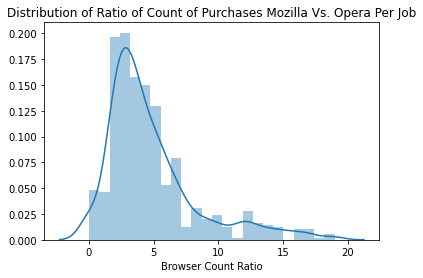

In [39]:
job_merge['Browser Count Ratio'] = job_merge['Count of Mozilla Purchases']/job_merge['Count of Opera Purchases']
job_merge['Total Count of Purchases'] = job_merge['Count of Mozilla Purchases']+job_merge['Count of Opera Purchases']
job_merge.replace(to_replace = np.nan, value = 0,inplace=True)  

sns.distplot(job_merge['Browser Count Ratio'])
plt.title('Distribution of Ratio of Count of Purchases Mozilla Vs. Opera Per Job')
plt.show()

In [40]:
#Browser preferences of top 10 job types
#jobBrowser = df.groupby(by=['Job', 'Browser'], as_index=False, )['Purchase Price'].count()
#jobBrowser.sort_values(by='Purchase Price', ascending = False)#group by Job and sort by total purchase amount

#plt.title(f"Browser Preferences of largest job groups :")
#ax = sns.barplot(x = "Purchase Price_y", y = "Job",hue="Browser" , orient = 'h', data = res1.merge(jobBrowser,on = 'Job' ,how = 'inner'))
#ax.set(ylabel="Job", xlabel = "Total Count of Purchases")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.show()


In [41]:
#plt.title(f"Browser Preferences of top spending job groups :")
#ax = sns.barplot(x = "Purchase Price_y", y = "Job",hue="Browser" , orient = 'h', data = res2.merge(jobBrowser,on = 'Job' ,how = 'inner'))
#ax.set(ylabel="Job", xlabel = "Total Count of Purchases")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.show()

#### 3. How does purchase depend on location and time?

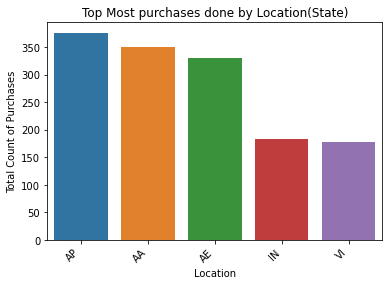

In [42]:
res=df.groupby(by='State', as_index=False).count()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
plt.title('Top Most purchases done by Location(State)')
ax = sns.barplot(x = "State", y = "Purchase Price", data = res)
ax.set(xlabel="Location", ylabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




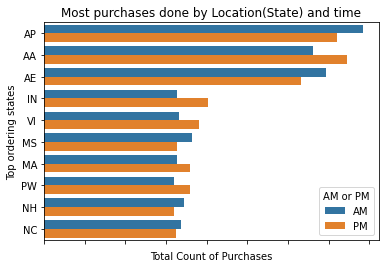

In [43]:
res=df.groupby(by='State', as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).iloc[:10,:]
res4=df.groupby(by=['State','AM or PM'], as_index=False)['Purchase Price'].count()
res4= res4.sort_values(by='Purchase Price', ascending=False)

plt.title('Most purchases done by Location(State) and time')
ax = sns.barplot(x = "Purchase Price_y", y = "State",hue="AM or PM" , orient = 'h', \
                 data = res.merge(res4, on = 'State', how = 'inner'))
ax.set(ylabel="Top ordering states", xlabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [44]:
#plt.figure(figsize=(25,5))
#sns.boxplot(x='State',y='Purchase Price',data=df,hue='AM or PM')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

In [45]:
state_count = df.groupby(by=['State','AM or PM'],as_index=False)['Purchase Price'].count()
state_count.rename(columns = {'Purchase Price':'Count of Purchases'},inplace=True)
state_count_am = state_count[state_count['AM or PM']=='AM']
state_count_pm = state_count[state_count['AM or PM']=='PM']
state_count_merge = pd.merge(state_count_am,state_count_pm,left_on='State',right_on='State')
state_count_merge.rename(columns = {'Count of Purchases_x':'Count of AM Purchases','Count of Purchases_y':'Count of PM Purchases'},inplace=True)
state_count_merge.drop(['AM or PM_x','AM or PM_y'],axis=1,inplace=True)
state_count_merge['Ratio_AM_PM'] = state_count_merge['Count of AM Purchases']/state_count_merge['Count of PM Purchases']
state_count_merge

,State,Count of AM Purchases,Count of PM Purchases,Ratio_AM_PM
0,AA,165,186,0.887097
1,AE,173,158,1.094937
2,AK,82,75,1.093333
3,AL,83,65,1.276923
4,AP,196,180,1.088889
...,...,...,...,...
57,VT,65,66,0.984848
58,WA,77,86,0.895349
59,WI,87,73,1.191781
60,WV,71,86,0.825581


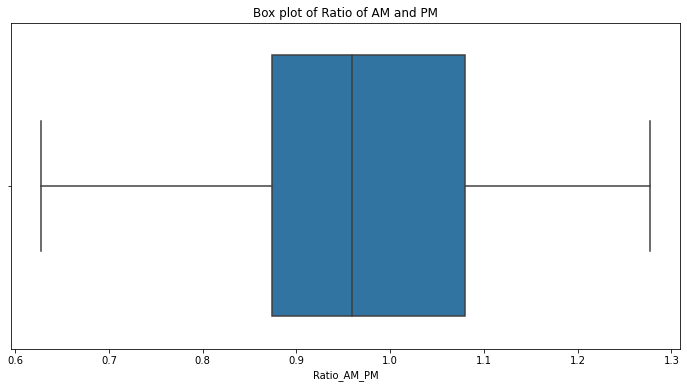

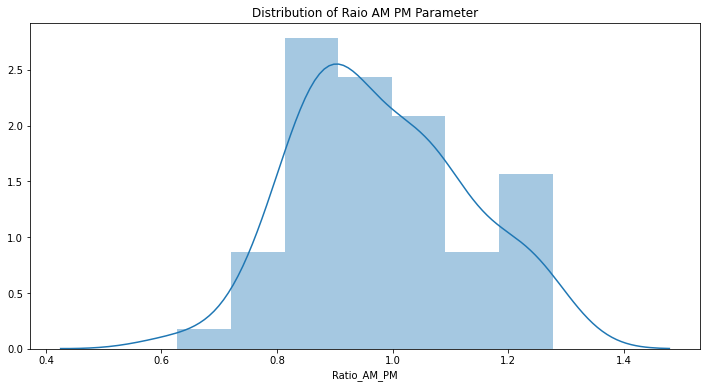

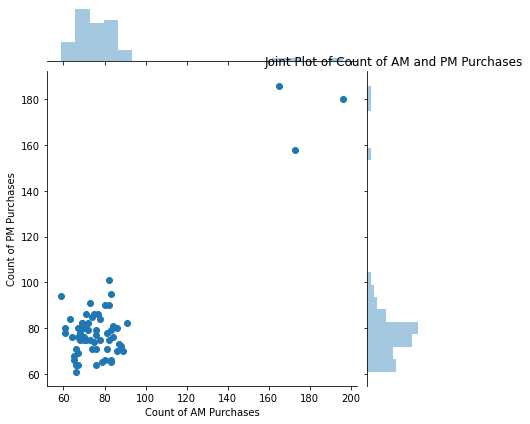

In [46]:
plt.subplots(figsize=(12,6))
sns.boxplot(state_count_merge['Ratio_AM_PM'])
plt.title('Box plot of Ratio of AM and PM' )
plt.show()
plt.subplots(figsize=(12,6))
sns.distplot(state_count_merge['Ratio_AM_PM'])
plt.title('Distribution of Raio AM PM Parameter')
plt.show()
sns.jointplot(data=state_count_merge, x="Count of AM Purchases", y="Count of PM Purchases")
plt.title('Joint Plot of Count of AM and PM Purchases')
plt.show()

In [47]:
#state_count = df.groupby(by=['State','AM or PM'],as_index=False)['Purchase Price'].count()
#state_count.rename(columns = {'Purchase Price':'Count of Purchases'},inplace=True)
#state_count_am = state_count[state_count['AM or PM']=='AM']
#state_count_pm = state_count[state_count['AM or PM']=='PM']
#state_count_merge = pd.merge(state_count_am,state_count_pm,left_on='State',right_on='State')
#state_count_merge.rename(columns = {'Count of Purchases_x':'Count of AM Purchases','Count of Purchases_y':'Count of PM Purchases'},inplace=True)
#state_count_merge.drop(['AM or PM_x','AM or PM_y'],axis=1,inplace=True)
#state_count_merge['Ratio_AM_PM'] = state_count_merge['Count of AM Purchases']/state_count_merge['Count of PM Purchases']
#state_count_merge_head = state_count_merge.sort_values(by='Ratio_AM_PM', ascending=False).head(5)
#state_count_merge_tail = state_count_merge.sort_values(by='Ratio_AM_PM', ascending=True).head(5)

In [48]:
#sns.barplot(x='State', y='Ratio_AM_PM',data=state_count_merge_head)
#plt.title('Top 5 States With More AM Purchases than PM' )
#plt.show()

In [49]:
#sns.barplot(x='State', y='Ratio_AM_PM',data=state_count_merge_tail)
#plt.title('Top 5 States With More PM Purchases than AM' )
#plt.show()

In [50]:
#plt.subplots(figsize=(12,6))
#sns.boxplot(state_count_merge['Ratio_AM_PM'])
#plt.title('Box plot of Ratio of AM and PM' )
#plt.show()
#plt.subplots(figsize=(12,6))
#sns.distplot(state_count_merge['Ratio_AM_PM'])
#plt.title('Distribution of Raio AM PM Parameter')
#plt.show()


In [51]:
#sns.jointplot(data=state_count_merge, x="Count of AM Purchases", y="Count of PM Purchases")
#plt.title('Joint Plot of Count of AM and PM Purchases')
#plt.show()

#### 4. How does purchase depend on ‘CC’ provider and time of purchase ‘AM or PM’?

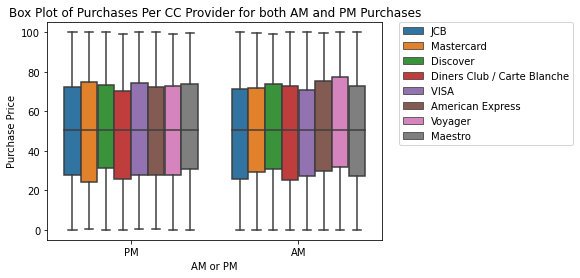

,CC Provider,AM Purchases Value,PM Purchases Value
0,American Express,21623.831288,21316.310174
1,Diners Club / Carte Blanche,18806.708268,18726.786684
2,Discover,20057.816684,22083.443194
3,JCB,63601.062428,64959.452750
4,Maestro,19553.615570,23300.607798
5,Mastercard,19208.953194,21752.363664
6,VISA,61813.091636,63311.107824
7,Voyager,22859.102080,20151.902872


In [52]:
sns.boxplot(x='AM or PM',y='Purchase Price',data=df,hue='CC Provider')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Box Plot of Purchases Per CC Provider for both AM and PM Purchases')
plt.show()
cc_count = df.groupby(by=['CC Provider','AM or PM'],as_index=False)['Purchase Price'].count()
cc_count.rename(columns = {'Purchase Price':'Count of Purchases'},inplace=True)
cc_sum = df.groupby(by=['CC Provider','AM or PM'],as_index=False)['Purchase Price'].sum()
cc_sum.rename(columns = {'Purchase Price':'Total Purchase Value'},inplace=True)
cc_sum
cc_mean = df.groupby(by=['CC Provider','AM or PM'],as_index=False)['Purchase Price'].mean()
cc_mean.rename(columns = {'Purchase Price':'Avg. Purchase Value'},inplace=True)
cc_mean
cc_count_am = cc_count[cc_count['AM or PM']=='AM']
cc_count_pm = cc_count[cc_count['AM or PM']=='PM']
cc_count_merge = pd.merge(cc_count_am,cc_count_pm,left_on='CC Provider',right_on='CC Provider')
cc_count_merge.rename(columns = {'Count of Purchases_x':'Count of AM Purchases','Count of Purchases_y':'Count of PM Purchases'},inplace=True)
cc_count_merge.drop(['AM or PM_x','AM or PM_y'],axis=1,inplace=True)
cc_count_merge
cc_sum_am = cc_sum[cc_sum['AM or PM']=='AM']
cc_sum_pm = cc_sum[cc_sum['AM or PM']=='PM']
cc_sum_merge = pd.merge(cc_sum_am,cc_sum_pm,left_on='CC Provider',right_on='CC Provider')
cc_sum_merge.rename(columns = {'Total Purchase Value_x':'AM Purchases Value','Total Purchase Value_y':'PM Purchases Value'},inplace=True)
cc_sum_merge.drop(['AM or PM_x','AM or PM_y'],axis=1,inplace=True)
cc_sum_merge

In [53]:
cc_merge = pd.merge(cc_count_merge, cc_sum_merge,left_on='CC Provider',right_on='CC Provider')
cc_merge

,CC Provider,Count of AM Purchases,Count of PM Purchases,AM Purchases Value,PM Purchases Value
0,American Express,428,421,21623.831288,21316.310174
1,Diners Club / Carte Blanche,382,385,18806.708268,18726.786684
2,Discover,389,428,20057.816684,22083.443194
3,JCB,1290,1294,63601.062428,64959.452750
4,Maestro,392,454,19553.615570,23300.607798
5,Mastercard,378,438,19208.953194,21752.363664
6,VISA,1245,1247,61813.091636,63311.107824
7,Voyager,428,401,22859.102080,20151.902872


In [54]:
#fig, axarr = plt.subplots(1, 2, figsize=(24, 7))
#CC_data_hue_cnt = df.groupby(by=['CC Provider','AM or PM'], as_index=False)['Purchase Price'].count()
#ax = sns.barplot(y = 'CC Provider', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = CC_data_hue_cnt,\
#            color = 'darkviolet', ax=axarr[0])
#ax.set(xlabel="Number of Orders", ylabel='CC Provider')
#axarr[0].set_title("Traffic of CC Provider usage count at different times", fontsize=15)

#CC_data_hue_sum = df.groupby(by=['CC Provider','AM or PM'], as_index=False)['Purchase Price'].sum()
#ax = sns.barplot(y = 'CC Provider', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = CC_data_hue_sum,\
#            color = 'saddlebrown', ax=axarr[1])
#ax.set(xlabel="Purchase Value", ylabel=None)
#axarr[1].set_title("Traffic of CC Provider usage value at different times", fontsize=15)
#plt.show()


In [55]:
#sns.boxplot(x='AM or PM',y='Purchase Price',data=df,hue='CC Provider')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Box Plot of Purchases Per CC Provider for both AM and PM Purchases')
#plt.show()

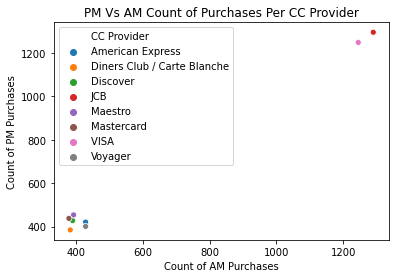

In [56]:
sns.scatterplot(x='Count of AM Purchases',y='Count of PM Purchases',data=cc_merge,hue='CC Provider')
plt.title('PM Vs AM Count of Purchases Per CC Provider')
plt.show()

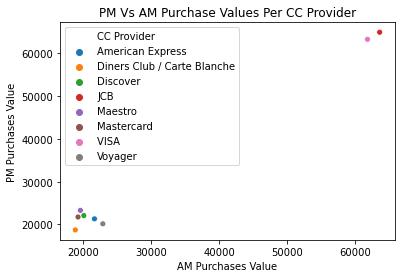

In [57]:
sns.scatterplot(x='AM Purchases Value',y='PM Purchases Value',data=cc_merge,hue='CC Provider')
plt.title('PM Vs AM Purchase Values Per CC Provider')
plt.show()

#### 5. What are top 5 of Location(State)?

[Text(0, 0, 'AP'),
 Text(0, 0, 'AA'),
 Text(0, 0, 'AE'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'IN')]

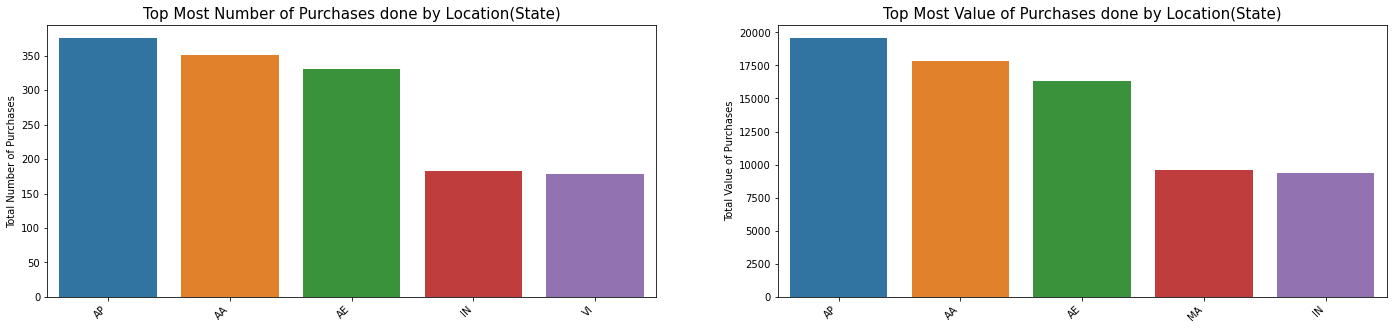

In [58]:
fig, axarr = plt.subplots(1, 2, figsize=(24, 5))
#print('The TOP 5 Locations(state) with number of purchase...')
res=df.groupby(by='State', as_index=False).count()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "State", y = "Purchase Price", data = res, ax=axarr[0])
axarr[0].set_title("Top Most Number of Purchases done by Location(State)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 Locations(state) with max amount of purchase...')
res=df.groupby(by='State', as_index=False).sum()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "State", y = "Purchase Price", data = res, ax=axarr[1])
axarr[1].set_title("Top Most Value of Purchases done by Location(State)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')



In [59]:
#print('The TOP 5 Professionals with max Number of Purchase...')
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].count()
res1= job.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1, ax=axarr[1][0])
axarr[1][0].set_title("Top Most Number of Purchases done by Professionals", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 Professionals with max Value of purchase...')
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].sum()
res1= job.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1, ax=axarr[1][1])
axarr[1][1].set_title("Top Most Value of Purchases done by Professionals", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 customers with max Number of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res, ax=axarr[2][0])
axarr[2][0].set_title("Top Most Number of Purchases done by Customers(Emails)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 customers with max Value of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res, ax=axarr[2][1])
axarr[2][1].set_title("Top Most Value of Purchases done by Customers(Emails)", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


#print('The TOP 5 CC Providers with max Number of purchase...')
res = df.groupby(by=['CC Provider'], as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "CC Provider", y = "Purchase Price", data = res, ax=axarr[3][0])
axarr[3][0].set_title("Top Most Number of Purchases done by CC Providers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 CC Providers with max Value of purchases...')
res = df.groupby(by=['CC Provider'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "CC Provider", y = "Purchase Price", data = res, ax=axarr[3][1])
axarr[3][1].set_title("Top Most Value of Purchases done by CC Providers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 languages with max Number of purchase...')
res = df.groupby(by=['Language'], as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Language", y = "Purchase Price", data = res, ax=axarr[4][0])
axarr[4][0].set_title("Top Most Number of Purchases done by different languages Customers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Number of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

#print('The TOP 5 languages with max Value of purchase...')
res = df.groupby(by=['Language'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
ax = sns.barplot(x = "Language", y = "Purchase Price", data = res, ax=axarr[4][1])
axarr[4][1].set_title("Top Most Value of Purchases done by different languages Customers", fontsize=15)
ax.set(xlabel=None, ylabel = "Total Value of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [ ]:
res4=df.groupby(by=['State','AM or PM'], as_index=False).count()[['State','Purchase Price','AM or PM']]
res4 = res4.pivot_table(values = 'Purchase Price', index = 'AM or PM', columns = 'State', aggfunc = 'sum')
res4

In [ ]:
res4=df.groupby(by=['State','AM or PM'], as_index=False).sum()[['State','Purchase Price','AM or PM']]
res4 = res4.pivot_table(values = 'Purchase Price', index = 'AM or PM', columns = 'State', aggfunc = 'sum')
res4

In [ ]:

sns.countplot(df['AM or PM'],label='Count')
plt.show()
ax = sns.barplot(y = df.groupby('AM or PM')['Purchase Price'].sum(), x = df.groupby('AM or PM')['Purchase Price'].sum().index)
ax.set(xlabel="AM or PM", ylabel = "Purchase Price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Top 5 most purchase done by professionals

In [ ]:
print('The TOP 5 customers with max amount of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

In [ ]:
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res)
ax.set(xlabel="Customer", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
print('The TOP 5 customers with max amount of purchase and their companies')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
pd.merge(df, res, how='inner', on = 'Email')[['Email', 'Company']]



Discover patterns for Purchase Price¶

In [ ]:
df['Purchase Price'].describe()

In [ ]:
# check the distribution of Purchase price
plt.subplots(figsize=(12,6))
sns.boxplot(df['Purchase Price'])
plt.show()
plt.subplots(figsize=(12,6))
sns.distplot(df['Purchase Price'])
plt.show()

In [ ]:
group_language_orders = df.groupby('Language')['Purchase Price'].count().sort_values()

# plot number of unique customers in each Language
plt.subplots(figsize=(15,8))
group_language_orders.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

plt.subplots(figsize=(15,8))
group_language_order_hue = df.groupby(['Language', 'AM or PM'])['Purchase Price'].count().sort_values(ascending = False).reset_index()
sns.barplot(y = 'Language', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = group_language_order_hue,\
            color = 'green' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

Browser Usage Analysis for purchase¶

In [ ]:
browser_data = df.groupby(by='Browser', as_index=False)['Purchase Price'].count()
browser_data

In [ ]:
from matplotlib.pyplot import pie, axis, show
browser_data['Browser']=browser_data['Browser'].map({'Mozilla':0,'Opera':1})

In [ ]:
labels = ['Mozilla','Opera']
colors = ['orange', 'green'] 
explode =(0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,4)) 
ax1.pie(browser_data['Purchase Price'], explode = explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
plt.title('Browser Usage Pattern for Purchase', fontsize = 15) 
ax1.legend(labels, loc = 'upper right') 
plt.tight_layout() 
plt.show()


In [ ]:
browser_data_hue = df.groupby(by=['Browser','AM or PM'], as_index=False)['Purchase Price'].count()
sns.barplot(y = 'Browser', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = browser_data_hue,\
            color = 'chocolate' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Browser', fontsize=12)
plt.title('Traffic of browsers at different times', fontsize=12)
plt.show()

In [ ]:
print('The TOP 5 Companies with max amount of purchase...')
res = df.groupby(by=['Company'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Company", y="Purchase Price", data=res)

In [ ]:
#res.iplot(kind='bar', x="Company", y="Purchase Price", color='green')


In [ ]:
#All jobs registered
df['Job'].value_counts().index

In [ ]:
plt.pie(df['Job'].value_counts().head(), labels = df['Job'].value_counts().head().index )
plt.title('Distribution of top 5 jobs')
plt.show()

In [ ]:
df['Job'].value_counts().head().index

In [ ]:
df['CC Provider'].str.split(pat = '\d', expand = True)[0].unique()#Find the 10 credit card providers

In [ ]:
df['CC Provider'] = df['CC Provider'].str.split(pat = '\d', expand = True)[0]

cctotal = df.groupby('CC Provider')['Purchase Price'].sum()
ccmean = df.groupby('CC Provider')['Purchase Price'].mean()
ccorder = df['CC Provider'].value_counts()
ccindex = df.groupby('CC Provider')['Purchase Price'].mean().index
ccorder = df['CC Provider'].value_counts()

plt.pie(cctotal, labels = ccindex )
plt.title('Total expediture by credit card type')
plt.show()

plt.pie(ccmean, labels = ccindex )
plt.title('Mean expediture by credit card typpe')
plt.show()

plt.pie(ccorder, labels = ccindex )
plt.title('Number of orders by credit card type')
plt.show()


In [ ]:
#Users with expired credit cards
exp = cleaned_ecom[(cleaned_ecom['CC Exp Year'] < 20) & (cleaned_ecom['CC Exp Month'] < 9)]
print("No of Users with expired cards ", exp['Email'].nunique())